In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [2]:
df_ROS = pd.read_csv('../../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS_forpatient = df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형', '재발여부']]

In [4]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [8]:
## 전처리: 대상 컬럼 의한 레코드 삭제 시 데이터셋 양 고려 
# df_ROS_forpatient.isnull().sum()
#머신러닝에서는 채워주지만 통계적인 부분에서는 주로 삭제시킴 
df_ROS_forpatient = df_ROS_forpatient.dropna()
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

In [9]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


### 상관관계 확인 
- 목표변수: '재발여부' - 분포 언발란스 (연속형: 정규화 확인, 범주형: 밸런스 확인)
- 설명변수: '성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형' (각 변수가 목표변수와 관련이 있는지 시각화를 통해 확인)
    - '성별': 남성의 발생율 높은 것 같다. 
    - '신장': 목표변수 대비 분포 변화 적음 (데이터 값을 확인한거지 눈으로 본거라 변화가 없다고 할 수는 없음)  
    - '심혈관질환': 질환자는 재발율 상대적으로 높다 
    - '체중': 몸무게 차이에 따라 분포 변화 영향 있음 (특정 몸무게 이상이거나 특정몸무게 이하에 재발여부 보임, 10kg이상 차이)
    - '흡연여부': 흡연자는 재발율이 상대적으로 높다. 
    - '연령': 상대적으로 나이 많으면 발생율 높은 것으로 보임
    - '직업': 건설업/수산업자 분들의 발생율이 상대적으로 높음.
    - '혈액형': 차이에 대한 여부 확인 필요 (확증 데이터 분석)
#### 데이터 값이 가장 많은 것, 가장 작은 것 비교 
#### 상위 ~개, 하위 ~개 

- 분석 스토리: 재발 방지를 위해서는 --줄이고 --조심하고 --늘려야함. 



    

<Axes: xlabel='재발여부', ylabel='count'>

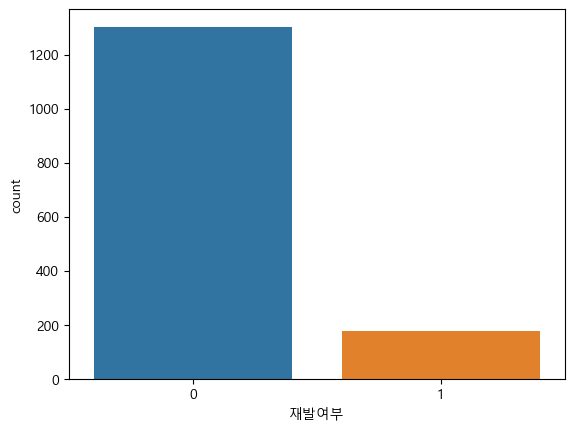

In [12]:
### 데이터 타입과 분포 
#재발여부 - 단일변수,범주형에 맞는 시각화: countplot 
## 목표 변수: 
sns.countplot(data=df_ROS_forpatient, x='재발여부')
# 0: no 재발, 1:yes 재발 
# unbalance되어 있는 목표변수- 데이터 구성이 재발이 안되어 있는 경우, 머신러닝에서 문제가 생김 
# 범주형인 경우 unbalance인지, 연속형인 경우에는 정규분포인지 확인 

In [14]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [23]:
# object 변환 대상 : 성별, 심혈관질환, 흡연여부, 재발여부 
# df_ROS_forpatient['심혈관질환'].value_counts()
# 두개 밖에 없으니 이것도 object로 변환 
df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']] = df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object)
# 하나 넣으면 series, 두개 이상 넣으면 dataframe 
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [26]:
# df_ROS_forpatient.describe().
# df_ROS_forpatient.describe().columns
forpatient_list = df_ROS_forpatient.describe().columns.to_list()
forpatient_list 

['신장', '체중', '연령']

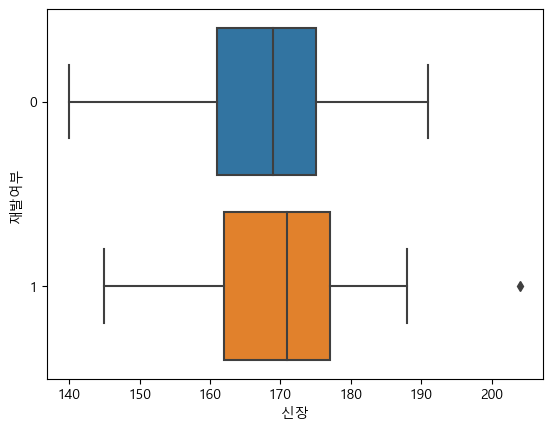

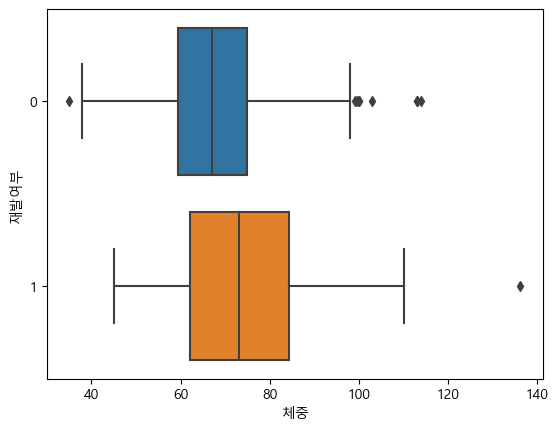

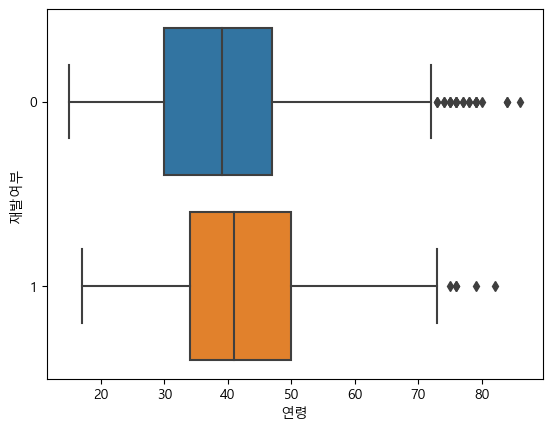

In [46]:
## x:연속형 / y:범주형 
for item in forpatient_list : 
    sns.boxplot(data=df_ROS_forpatient, x=item, y='재발여부', orient='h') # 이상치 한개 존재 
    plt.show()

In [42]:
## x:범주형 / y:범주형 
# df_ROS_forpatient.drop(columns=['재발여부'])
# df_ROS_forpatient.describe(include=object)
# 전체에서가 아니라 object 단위타입에서만 재발여부 컬럼을 삭제 
df_ROS_forpatient.describe(include=object).drop(columns=['재발여부'])
# 포문 돌리기 위해 columns가져와서 리스트로 만들기 -> 담기 
forpatient_object_list = df_ROS_forpatient.describe(include=object).drop(columns=['재발여부']).columns.to_list()
forpatient_object_list

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

<Axes: xlabel='성별', ylabel='재발여부'>

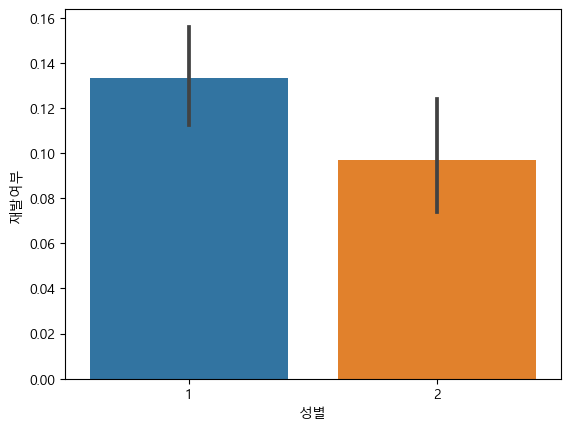

In [44]:
#범주형 / 범주형 시각화 
sns.barplot(data=df_ROS_forpatient, x='성별', y='재발여부')

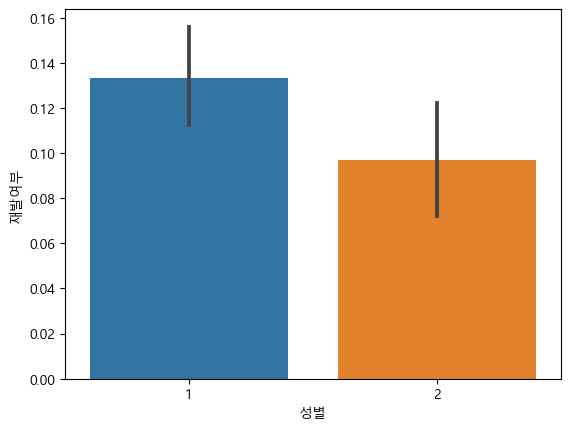

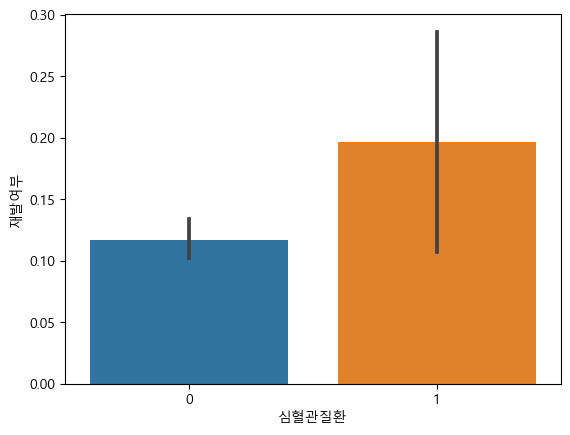

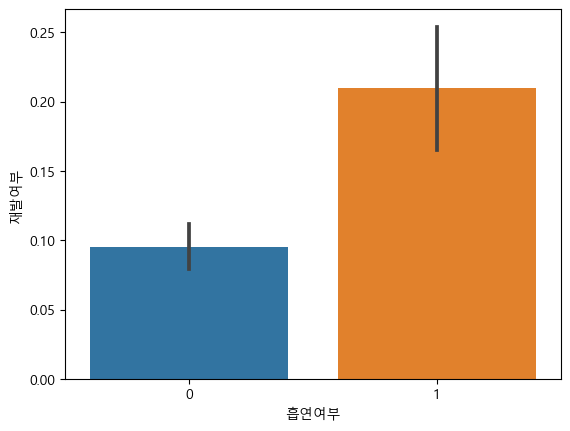

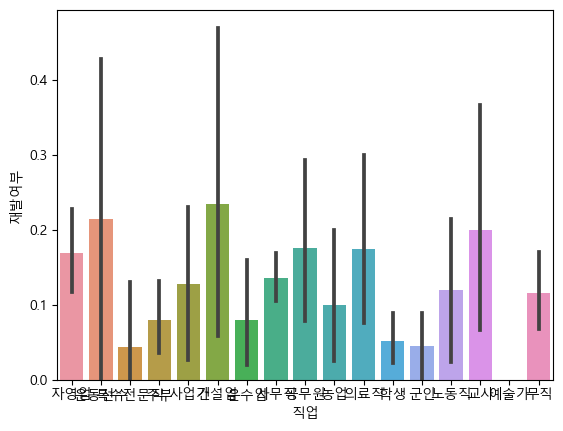

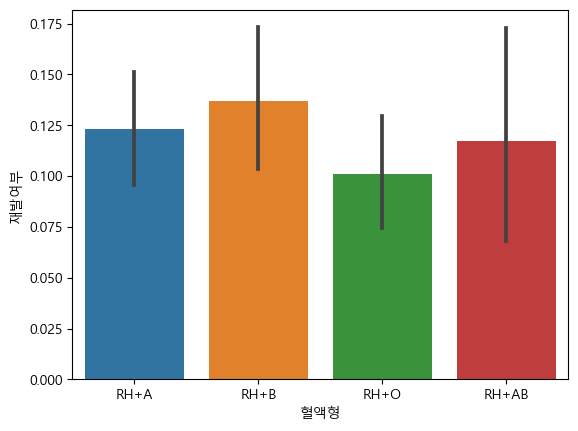

In [45]:
for item in forpatient_object_list : 
    sns.barplot(data = df_ROS_forpatient, x=item, y='재발여부')
    plt.show()